# CoreMS Assignments to Peterson Bucket

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [1]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [2]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

The total number of peaks (92,307) is illustrated with `len(mass_spectrum)`.

In [3]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 2, "H": 4, "O": 1}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[7]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks


11846


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

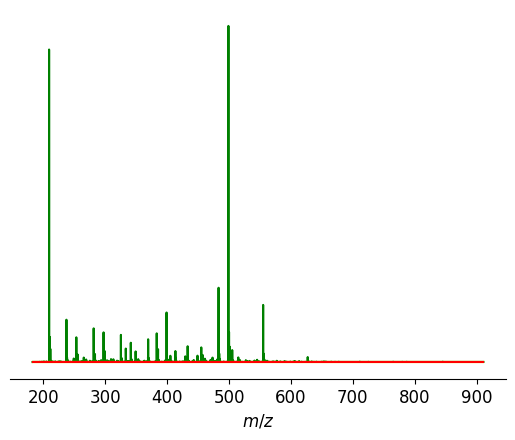

In [4]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [5]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 498.9301865 m/z | 100.0000 abundance | 1279598.0 resolving power | 72576.4 S/N | -0.6331 KMD
2: 209.0852963 m/z | 92.9720 abundance | 4406528.0 resolving power | 67475.7 S/N | -0.9608 KMD
3: 483.0417328 m/z | 22.0740 abundance | 1197432.0 resolving power | 16019.5 S/N | -0.7541 KMD
4: 555.0628851 m/z | 16.9650 abundance | 1227359.0 resolving power | 12311.5 S/N | -0.7324 KMD
5: 398.9365961 m/z | 14.7070 abundance | 1842420.0 resolving power | 10672.9 S/N | -0.6991 KMD
6: 237.1165940 m/z | 12.5620 abundance | 3647412.0 resolving power | 9115.9 S/N | -0.9754 KMD
7: 498.9331639 m/z | 10.8190 abundance | 43220.0 resolving power | 7851.5 S/N | -0.6361 KMD
8: 498.9264100 m/z | 10.1510 abundance | 42427.0 resolving power | 7366.1 S/N | -0.6293 KMD
9: 281.1428176 m/z | 9.9880 abundance | 2893468.0 resolving power | 7248.1 S/N | -0.9754 KMD
10: 209.0847879 m/z | 9.4470 abundance | 227852.0 resolving power | 6855.5 S/N | -0.9603 KMD
11: 498.9190761 m/z | 9.0750 a

In [6]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 2, 'H': 4, 'O': 1}


### 4. Molecular formula search
The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

In [7]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)   # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2   # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 66   # Max DBE 66 for C100 (empirical Max DBE = 2C/3)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  608.64 ms


Loading molecular formula database: 201486it [00:17, 11684.52it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [00:20<00:00, 14.31it/s]
Loading molecular formula database: 77511it [00:10, 7448.18it/s] 
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:08<00:00, 17.52it/s]


'run_molecular_formula'  58150.77 ms
2165 assigned peaks and 9681 unassigned peaks, total  = 18.28 %, relative abundance = 36.48 %, RMS error (best candidate) (ppm) = 0.083


(2165, 9681, 18.27621137936856, 36.48173563196754, 0.0825384361819631)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.

<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

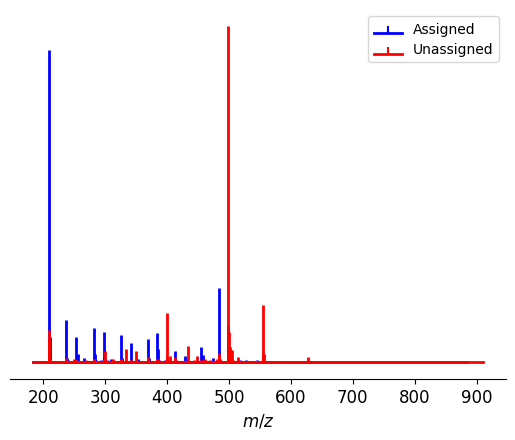

In [8]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### 6. Exploring Mass Spectrum

In [9]:
for mspeaks in mass_spectrum.sort_by_abundance(reverse=True)[:20]:
    for mf in mspeaks:
        print(f"Abundance: {mspeaks.abundance:.2f} | "
                f"Exp m/z: {mspeaks.mz_exp:.7f} | "
              f"calc m/z: {mf.mz_calc:.6f} | "
              f"Error: {mf.mz_error:.6f} | "
              f"DBE: {mf.dbe} | "
              f"H/C: {mf.H_C:.6f} | "
              f"O/C: {mf.O_C:.6f} | "
              f"AI mod: {mf.A_I_mod:.6f} | "
              f"KMD: {mf.kmd:.4f} | "
              f"Class: {mf.class_label} | "
              f"Formula: {mf.string_formated}")

Abundance: 92.97 | Exp m/z: 209.0852963 | calc m/z: 209.085304 | Error: -0.035777 | DBE: 0.0 | H/C: 2.250000 | O/C: 0.500000 | AI mod: 0.000000 | KMD: -0.9608 | Class: S1 O4 | Formula: C₈H₁₈O₄S₁
Abundance: 22.07 | Exp m/z: 483.0417328 | calc m/z: 483.041643 | Error: 0.185166 | DBE: 12.0 | H/C: 0.842105 | O/C: 0.789474 | AI mod: 0.391304 | KMD: -0.7540 | Class: O15 | Formula: C₁₉H₁₆O₁₅
Abundance: 12.56 | Exp m/z: 237.1165940 | calc m/z: 237.116604 | Error: -0.041791 | DBE: 0.0 | H/C: 2.200000 | O/C: 0.400000 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O4 | Formula: C₁₀H₂₂O₄S₁
Abundance: 9.99 | Exp m/z: 281.1428176 | calc m/z: 281.142819 | Error: -0.003763 | DBE: 0.0 | H/C: 2.166667 | O/C: 0.416667 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O5 | Formula: C₁₂H₂₆O₅S₁
Abundance: 8.79 | Exp m/z: 297.1377333 | calc m/z: 297.137733 | Error: 0.000076 | DBE: 0.0 | H/C: 2.166667 | O/C: 0.500000 | AI mod: 0.000000 | KMD: -0.9608 | Class: S1 O6 | Formula: C₁₂H₂₆O₆S₁
Abundance: 8.50 | Exp m/z: 

In [10]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_mz()[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 182.3506416 m/z | 0.0060 abundance | 3225205.0 resolving power | 3.2 S/N | -0.2421 KMD
2: 182.3584473 m/z | 0.0060 abundance | 3148432.0 resolving power | 3.1 S/N | -0.2499 KMD
3: 182.3719504 m/z | 0.0060 abundance | 2805845.0 resolving power | 3.5 S/N | -0.2634 KMD
4: 182.3741687 m/z | 0.0060 abundance | 3400231.0 resolving power | 3.7 S/N | -0.2656 KMD
5: 182.3915040 m/z | 0.0060 abundance | 2734871.0 resolving power | 3.3 S/N | -0.2829 KMD
6: 182.3923764 m/z | 0.0060 abundance | 1895730.0 resolving power | 3.7 S/N | -0.2838 KMD
7: 182.3924146 m/z | 0.0060 abundance | 1827329.0 resolving power | 3.3 S/N | -0.2838 KMD
8: 182.4082942 m/z | 0.0060 abundance | 1974597.0 resolving power | 3.7 S/N | -0.2997 KMD
9: 182.4458308 m/z | 0.0060 abundance | 4037324.0 resolving power | 3.1 S/N | -0.3372 KMD
10: 182.4604583 m/z | 0.0060 abundance | 3498729.0 resolving power | 3.7 S/N | -0.3518 KMD
11: 182.4767532 m/z | 0.0060 abundance | 2557074.0 resolving power | 

### 7. Exporting Molecular Formula Results

In [11]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "Peterson_Bucket_neg_CoreMS.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
0,48,183.029897,183.029897,183.029897,0.010,NaN,3460960.0,5.969,-1,0.002713,...,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,160,185.081920,185.081920,185.081932,0.007,NaN,2395349.0,4.238,-1,-0.065253,...,14.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167,185.154704,185.154704,185.154703,0.011,NaN,3717828.0,7.342,-1,0.000022,...,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,386,190.062190,190.062190,190.062200,0.009,NaN,3511205.0,5.472,-1,-0.054667,...,9.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,430,191.074725,191.074725,191.074739,0.017,NaN,3803940.0,11.267,-1,-0.071681,...,16.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.sort_values(by=["Peak Height"], ascending=False).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
10076,9499,498.930186,498.930186,NaN,100.000,NaN,1279598.0,72576.412,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1237,209.085296,209.085296,209.085304,92.972,NaN,4406528.0,67475.680,-1,-0.035777,...,18.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1489,8962,483.041733,483.041733,483.041643,22.074,NaN,1197432.0,16019.538,-1,0.185166,...,16.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11174,10864,555.062885,555.062885,NaN,16.965,NaN,1227359.0,12311.529,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8277,7129,398.936596,398.936596,NaN,14.707,NaN,1842420.0,10672.936,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2279,237.116594,237.116594,237.116604,12.562,NaN,3647412.0,9115.865,-1,-0.041791,...,22.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
10077,9500,498.933164,498.933164,NaN,10.819,NaN,43220.0,7851.504,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10075,9498,498.926410,498.926410,NaN,10.151,NaN,42427.0,7366.083,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,3796,281.142818,281.142818,281.142819,9.988,NaN,2893468.0,7248.115,-1,-0.003763,...,26.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3373,1235,209.084788,209.084788,NaN,9.447,NaN,227852.0,6855.515,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.sort_values(by=["m/z"], ascending=True).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
2167,0,182.350642,182.350642,NaN,0.006,NaN,3225205.0,3.238,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2168,1,182.358447,182.358447,NaN,0.006,NaN,3148432.0,3.061,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2169,2,182.371950,182.371950,NaN,0.006,NaN,2805845.0,3.464,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2170,3,182.374169,182.374169,NaN,0.006,NaN,3400231.0,3.687,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,4,182.391504,182.391504,NaN,0.006,NaN,2734871.0,3.315,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2172,5,182.392376,182.392376,NaN,0.006,NaN,1895730.0,3.677,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2173,6,182.392415,182.392415,NaN,0.006,NaN,1827329.0,3.328,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2174,7,182.408294,182.408294,NaN,0.006,NaN,1974597.0,3.711,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2175,8,182.445831,182.445831,NaN,0.006,NaN,4037324.0,3.100,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2176,9,182.460458,182.460458,NaN,0.006,NaN,3498729.0,3.674,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.

In [15]:
for col in df.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
C
H
O
N
S
13C
15N
17O
18O
33S
34S


In [16]:
from corems.mass_spectrum.output.export import HighResMassSpecExport

# Create an export instance
# You need to provide an output file path (even though we're just getting a DataFrame)
# Create output paths for different formats
csv_file = exports_dir / "Peterson_Bucket_neg_CoreMS_plus.csv"

exporter = HighResMassSpecExport(csv_file, mass_spectrum, output_type="pandas")

# If you want additional columns (like Aromaticity Index)
df_with_extras = exporter.get_pandas_df(additional_columns=["Aromaticity Index"])

In [17]:
df_with_extras.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
0,48,183.029897,183.029897,183.029897,0.010,NaN,3460960.0,5.969,-1,0.002713,...,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,160,185.081920,185.081920,185.081932,0.007,NaN,2395349.0,4.238,-1,-0.065253,...,14.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167,185.154704,185.154704,185.154703,0.011,NaN,3717828.0,7.342,-1,0.000022,...,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,386,190.062190,190.062190,190.062200,0.009,NaN,3511205.0,5.472,-1,-0.054667,...,9.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,430,191.074725,191.074725,191.074739,0.017,NaN,3803940.0,11.267,-1,-0.071681,...,16.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for col in df_with_extras.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
Aromaticity Index
C
H
O
N
S
13C
15N
17O
18O
33S
34S
